# TOD Syn41 Sequencing Analysis

Here we look at the polyA in the TOD Syn41. We analyze the polyA length, substitution rates, insertion rates.

We begin by scanning Read1 and loading in the polyAs.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import pandas as pd
from itertools import islice
import os

In [76]:
# Set up reference sequence
S141 = 'GGGTACAAAAAAAAAAAGTACAAAGAAACAACAACAACAAC'

In [94]:
# Set up lists of dictionaries to structure our data

WT_experiments = [
    {
     "Name": "SSII",
     "Barcode": "ACCAGGCGCTGG"
    },
    {
     "Name": "SSII+Mn",
     "Barcode": "GAGGCCTTGGCC"
    },
    {
     "Name": "SSIII",
     "Barcode": "CTTTAAAATATA"
    },
    {
     "Name": "SSIV",
     "Barcode": "TGACTTGCACAT"
    },
    {
     "Name": "MMLV",
     "Barcode": "CTGCGTGCAAAC"
    },
    {
     "Name": "TGIRT",
     "Barcode": "TGCGCCATTGCT"
    },
    {
     "Name": "AMV",
     "Barcode": "ACAAAATGGTGG"
    },
]

A5_experiments = [
    {
     "Name": "SSII",
     "Barcode": "GATTTGCACCTA"
    },
    {
     "Name": "SSII+Mn",
     "Barcode": "GGTATATGTACA"
    },
    {
     "Name": "SSIII",
     "Barcode": "CCCGCGCTGGGT"
    },
    {
     "Name": "SSIV",
     "Barcode": "ATGCATGCACAG"
    },
    {
     "Name": "MMLV",
     "Barcode": "TGGCGAACATGG"
    },
    {
     "Name": "TGIRT",
     "Barcode": "TAATGCAACTTC"
    },
    {
     "Name": "AMV",
     "Barcode": "GCAAATGTGCTA"
    },
]

A10_experiments = [
    {
     "Name": "SSII",
     "Barcode": "CTTTCCCACACT"
    },
    {
     "Name": "SSII+Mn",
     "Barcode": "AACGTGTGTGAC"
    },
    {
     "Name": "SSIII",
     "Barcode": "GCCTGGGTGGCT"
    },
    {
     "Name": "SSIV",
     "Barcode": "TGACCATGTATA"
    },
    {
     "Name": "MMLV",
     "Barcode": "TATGCCCCAAAT"
    },
    {
     "Name": "TGIRT",
     "Barcode": "AAGGACCACTGG"
    },
    {
     "Name": "AMV",
     "Barcode": "CTTATTACACAC"
    }
]

In [95]:
def load_polyas(r1_path, flanking_sequences):
    """
    Given a path to the Miseq Read1 Fastq and a list of two flanking sequences
    Return a list of all of the sequences that are between the flanking regions
    """
    print("Loading sequences from: " + r1_path)

    r1_sequences = []
    with open(r1_path) as f:
        for line in islice(f, 1, None, 4):
            r1_sequences.append(line.strip())
    polyA_sequences = []

    for seq in r1_sequences:
        i = seq.find(flanking_sequences[0])
        j = seq.find(flanking_sequences[1])
        if i >= 0 and j >= 0 and j > i:
            read_polyA = seq[i + len(flanking_sequences[0]):j]
            polyA_sequences.append(read_polyA)
    
    return polyA_sequences

In [96]:
# Load polyAs for S1 and S7 for all three constructs
for i, experiment in enumerate(WT_experiments):
    polyA_sequences = load_polyas(os.path.join('pbAdaptBp_demux', experiment['Barcode'], "Undetermined_S0_L001_R1_001.fastq"), ['TTGTAC', 'GTACCC'])
    WT_experiments[i]['polyA_sequences'] = polyA_sequences

for i, experiment in enumerate(A5_experiments):
    polyA_sequences = load_polyas(os.path.join('TruSeq1_demux', experiment['Barcode'], "SampleTruSeq1_S1_L001_R1_001.fastq"), ['TTGTAC', 'GTACCC'])
    A5_experiments[i]['polyA_sequences'] = polyA_sequences
    
for i, experiment in enumerate(A10_experiments):
    polyA_sequences = load_polyas(os.path.join('TruSeq2_demux', experiment['Barcode'], "SampleTruSeq2_S2_L001_R1_001.fastq"), ['TTGTAC', 'GTACCC'])
    A10_experiments[i]['polyA_sequences'] = polyA_sequences

Loading sequences from: pbAdaptBp_demux/ACCAGGCGCTGG/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/GAGGCCTTGGCC/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/CTTTAAAATATA/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/TGACTTGCACAT/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/CTGCGTGCAAAC/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/TGCGCCATTGCT/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: pbAdaptBp_demux/ACAAAATGGTGG/Undetermined_S0_L001_R1_001.fastq
Loading sequences from: TruSeq1_demux/GATTTGCACCTA/SampleTruSeq1_S1_L001_R1_001.fastq
Loading sequences from: TruSeq1_demux/GGTATATGTACA/SampleTruSeq1_S1_L001_R1_001.fastq
Loading sequences from: TruSeq1_demux/CCCGCGCTGGGT/SampleTruSeq1_S1_L001_R1_001.fastq
Loading sequences from: TruSeq1_demux/ATGCATGCACAG/SampleTruSeq1_S1_L001_R1_001.fastq
Loading sequences from: TruSeq1_demux/TGGCGAACA

## PolyA lengths

Count the lengths of all polyAs and plot histograms to visualize the distributions of lengths.

In [97]:
def plot_polyA_lengths(experiment, axis):
    """
    Given an experiment and axis, graph the polyA lengths histogram
    """
    colors = ['blue', 'red']
    polyA_lengths = [len(x) for x in experiment['polyA_sequences']]
    sns.distplot(polyA_lengths, hist=True, kde=False, hist_kws={'density': True, "alpha":0.8},
                 label=experiment['Name'], bins=np.arange(min(polyA_lengths),max(polyA_lengths)+1),
                 ax=axis, color='#DC267F')
    axis.set_xlim([5,15])
    axis.set_ylim([0, 1])
    axis.axvline(x=11.5, color='k', linestyle='--', label='Expected polyA length')

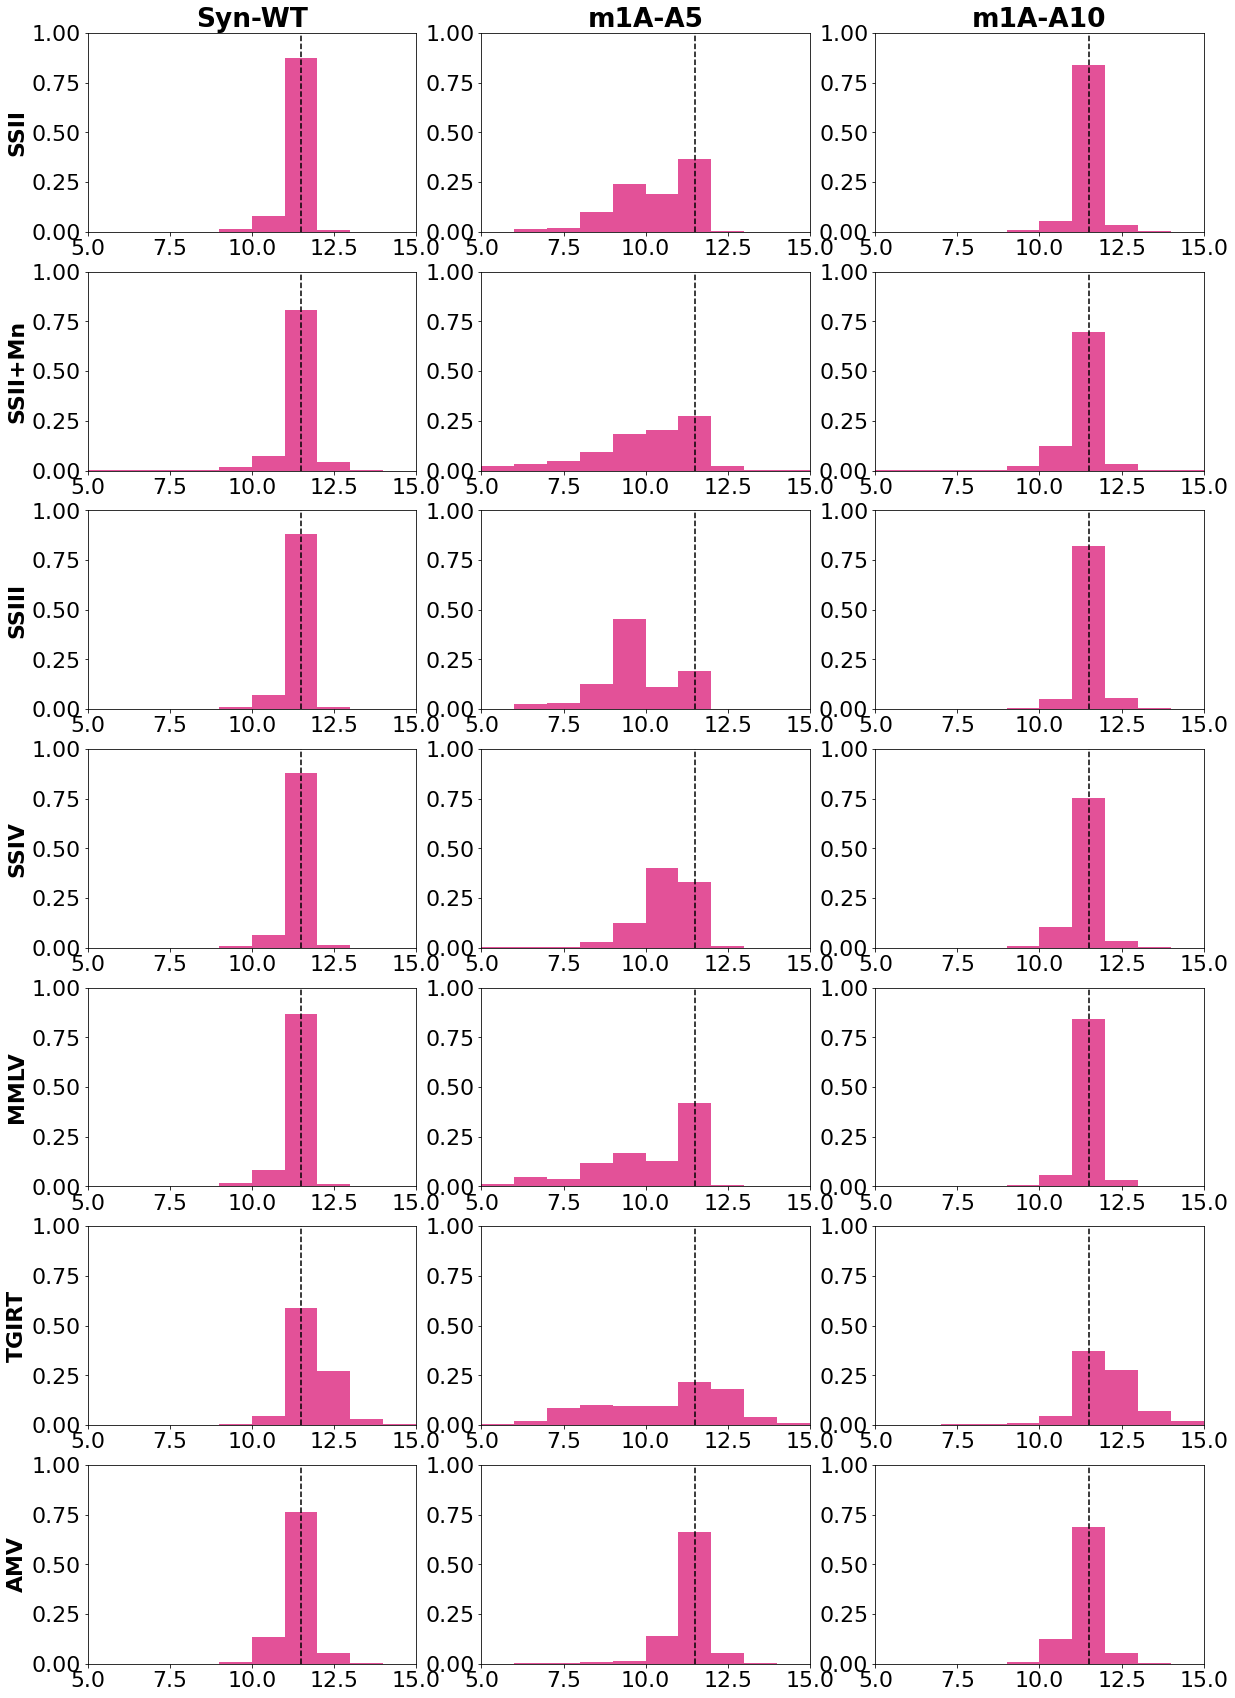

In [98]:
"""
Plot out on a grid histograms of polyA lengths for each RT condition, for each construct
"""

# Set up grid
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20,30))

# Plot each item on grid
for i in range(len(WT_experiments)):
    plot_polyA_lengths(WT_experiments[i], axs[i][0])
    plot_polyA_lengths(A5_experiments[i], axs[i][1])
    plot_polyA_lengths(A10_experiments[i], axs[i][2])

# Construct titles
axs[0][0].set_title('Syn-WT', fontweight='bold')
axs[0][1].set_title('m1A-A5', fontweight='bold')
axs[0][2].set_title('m1A-A10', fontweight='bold')

# RT condition titles
names = [experiment['Name'] for experiment in WT_experiments]
for i, name in enumerate(names):
    axs[i][0].set_ylabel(name, fontweight='bold')

plt.rcParams.update({'font.size': 22})
plt.savefig('TOD_syn_polyA_lengths')

In [86]:
"""
Save all polyA length counts to a CSV, one for each construct
"""
data = {}
for experiment in WT_experiments:
    counts = np.zeros(100)
    for i in experiment['polyA_sequences']:
        counts[len(i)] += 1
    data[experiment['Name']] = counts
pd.DataFrame(data).to_csv('TOD_syn_WT_counts.csv')

data = {}
for experiment in A5_experiments:
    counts = np.zeros(100)
    for i in experiment['polyA_sequences']:
        counts[len(i)] += 1
    data[experiment['Name']] = counts
pd.DataFrame(data).to_csv('TOD_syn_A5_counts.csv')

data = {}
for experiment in A10_experiments:
    counts = np.zeros(100)
    for i in experiment['polyA_sequences']:
        counts[len(i)] += 1
    data[experiment['Name']] = counts
pd.DataFrame(data).to_csv('TOD_syn_A10_counts.csv')

## PolyA Substitution and Insertion rates

Now we are interested in looking at the location and rate of substitutions and insertions.

In [99]:
def count_substitutions(polyA_sequences):
    """
    Given a list of polyA sequences
    Filter for those that have length 11
    Count up where the non-As are
    Normalize by the number of length 11 polyAs
    """
    coverage = len(polyA_sequences)
    mutation_indices = np.zeros(100)
    denominator = 0
    
    for seq in polyA_sequences:
        if len(seq) == 11:
            denominator += 1
            for i,c in enumerate(seq):
                if c is not 'T':
                    mutation_indices[i] += 1
    
    result = mutation_indices/denominator
    return result


def count_insertions(polyA_sequences):
    """
    Given a list of polyA sequences
    Count up all of the insertions (taking into account insertions of length >1)
    Normalize by the number of sequences with >=11 As
    """
    coverage = len(polyA_sequences)
    mutation_indices = np.zeros(12)
    denominator = 0
    
    for seq in polyA_sequences:
        muts_tmp = np.zeros(12)
        insertion_already_seen = False
        for i,c in enumerate(seq):
            if c is not 'T' and not insertion_already_seen and i < 12:
                muts_tmp[i] += 1
        if seq.count('T') >= 11:
            mutation_indices = mutation_indices + muts_tmp
            denominator += 1
    
    return mutation_indices/denominator

In [100]:
def grouped_barplot(ax, bars1, bars2, bars3):
    """
    Given an axis and 3 lists of histograms
    Plot all three on a single grouped barplot
    """
    # Adapted from https://python-graph-gallery.com/11-grouped-barplot/
    # set width of bar
    barWidth = .25

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    ax.bar(r1, bars1, color='#648FFF', width=barWidth, edgecolor='white', label='WT')
    ax.bar(r2, bars2, color='#DC267F', width=barWidth, edgecolor='white', label='m1A-5')
    ax.bar(r3, bars3, color='#FFB000', width=barWidth, edgecolor='white', label='m1A-10')

    # Add xticks on the middle of the group bars
#     ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_xticks([r + barWidth for r in range(len(bars1))], range(1,12))

    ax.set_xlim([0,11])
    ax.set_ylim([0, 0.25])
    # Create legend & Show graphic
    ax.legend()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


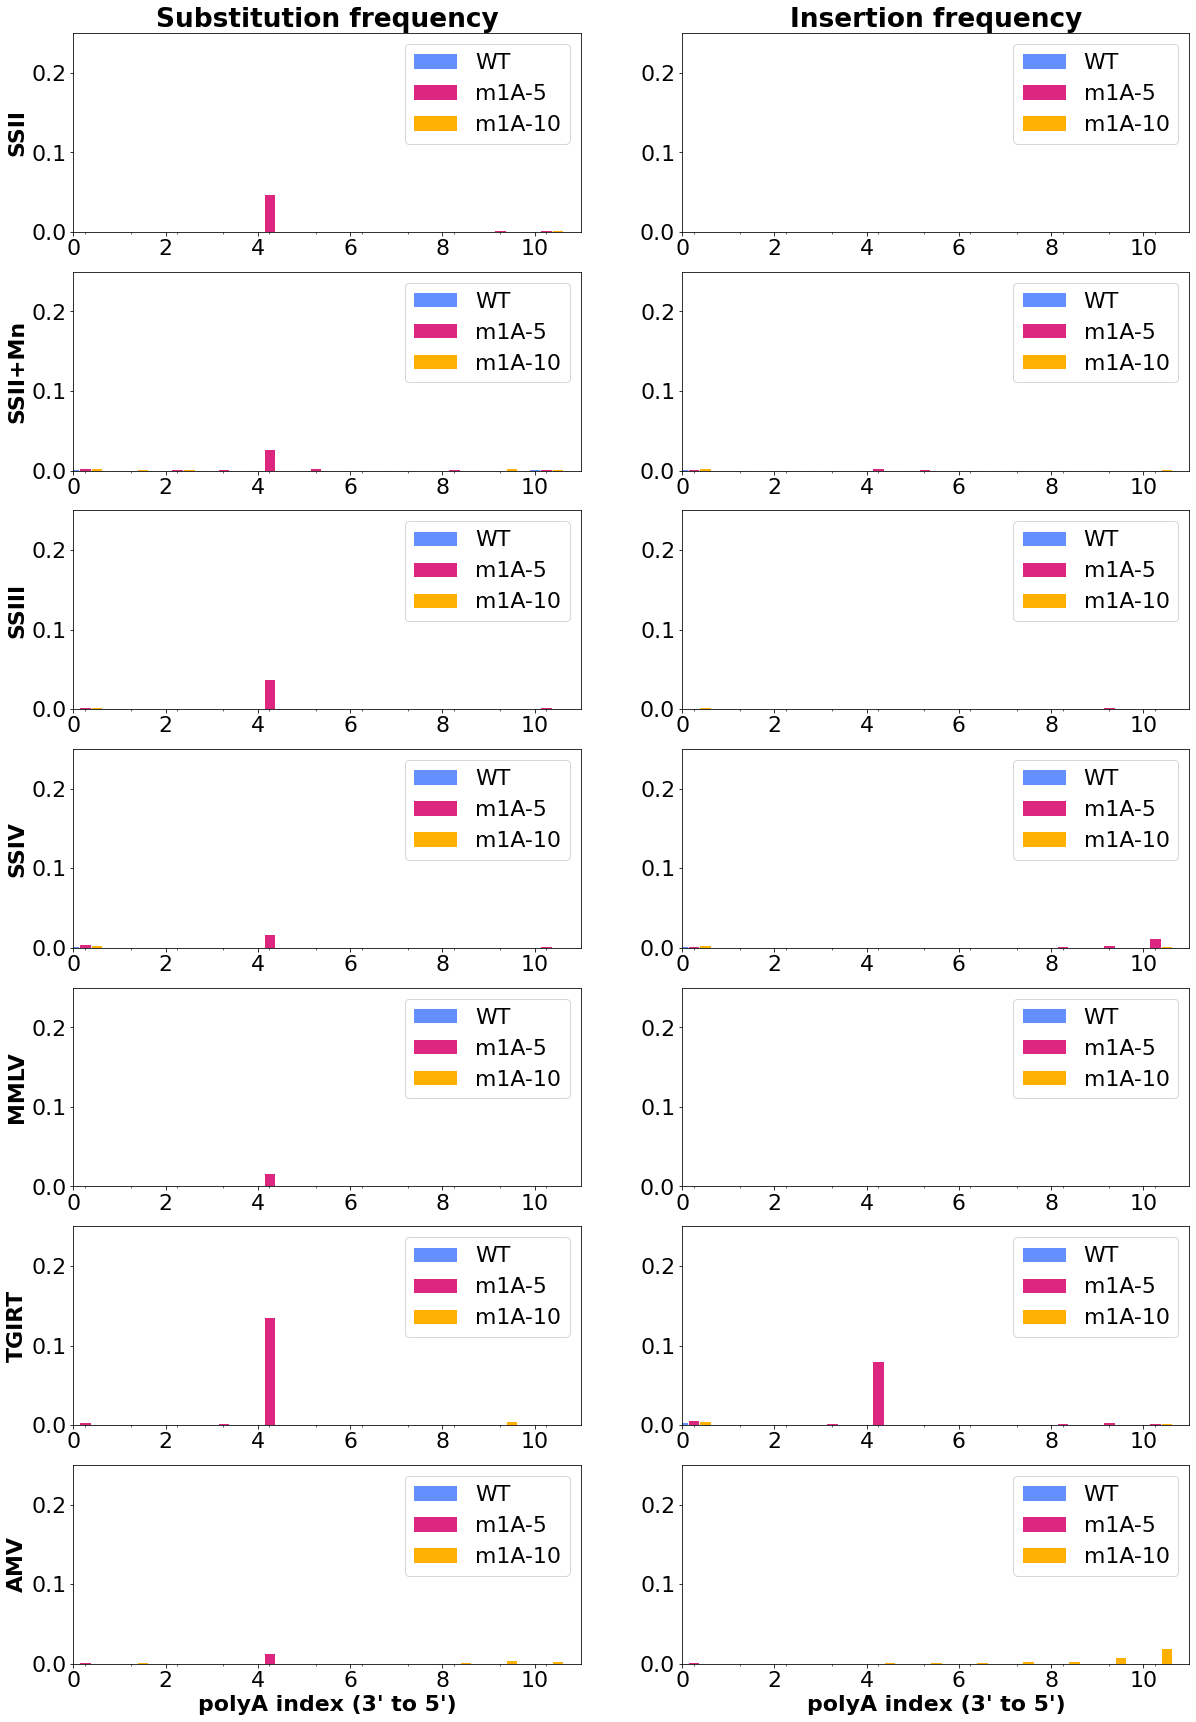

In [83]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20,30))

for i, experiment in enumerate(WT_experiments):
    name = experiment['Name']

    bars1 = count_substitutions(WT_experiments[i]['polyA_sequences'])
    bars2 = count_substitutions(A5_experiments[i]['polyA_sequences'])
    bars3 = count_substitutions(A10_experiments[i]['polyA_sequences'])
    
    grouped_barplot(axs[i][0], bars1, bars2, bars3)
    
for i, experiment in enumerate(WT_experiments):
    name = experiment['Name']

    bars1 = count_insertions(WT_experiments[i]['polyA_sequences'])
    bars2 = count_insertions(A5_experiments[i]['polyA_sequences'])
    bars3 = count_insertions(A10_experiments[i]['polyA_sequences'])
    
    grouped_barplot(axs[i][1], bars1, bars2, bars3)
    
    
names = [experiment['Name'] for experiment in WT_experiments]
for i, name in enumerate(names):
    axs[i][0].set_ylabel(name, fontweight='bold')
    
axs[0][0].set_title('Substitution frequency', fontweight='bold')
axs[0][1].set_title('Insertion frequency', fontweight='bold')

axs[6][0].set_xlabel('polyA index (3\' to 5\')', fontweight='bold')
axs[6][1].set_xlabel('polyA index (3\' to 5\')', fontweight='bold')

plt.savefig('TOD_syn_polyA_substitutions_insertions')

In [84]:
# Dump the substitution and insertion data into CSVs, one for each experiment
for i, experiment in enumerate(WT_experiments):
    data = {}
    name = experiment['Name']

    bars1 = count_substitutions(WT_experiments[i]['polyA_sequences'])
    bars2 = count_substitutions(A5_experiments[i]['polyA_sequences'])
    bars3 = count_substitutions(A10_experiments[i]['polyA_sequences'])
    
    data['WT'] = bars1
    data['A5'] = bars2
    data['A10'] = bars3
    
    pd.DataFrame(data).to_csv('TOD_syn_substitution_' + name + '.csv')
    
    
for i, experiment in enumerate(WT_experiments):
    data = {}
    name = experiment['Name']

    bars1 = count_insertions(WT_experiments[i]['polyA_sequences'])
    bars2 = count_insertions(A5_experiments[i]['polyA_sequences'])
    bars3 = count_insertions(A10_experiments[i]['polyA_sequences'])
    
    data['WT'] = bars1
    data['A5'] = bars2
    data['A10'] = bars3
    
    pd.DataFrame(data).to_csv('TOD_syn_insertion_collapsed' + name + '.csv')
    